In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set publication-quality plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

# Load raw heatwave data
print("Loading raw heatwave data...")
cpv = pd.read_csv('/home/raj.ayush/results/heatwaves/cpv_new100.csv')
extr = pd.read_csv('/home/raj.ayush/results/heatwaves/extr_new.csv')
gv = pd.read_csv('/home/raj.ayush/results/heatwaves/gv_new100.csv')

print(f"CPV shape: {cpv.shape}")
print(f"EXTR shape: {extr.shape}")
print(f"GV shape: {gv.shape}")
print("\nCPV columns:", cpv.columns.tolist())

Loading raw heatwave data...
CPV shape: (6487, 16)
EXTR shape: (10786964, 11)
GV shape: (8011095, 12)

CPV columns: ['cp', 'n_nodes', 'time_amin', 'time_amax', 'itime_amin', 'itime_amax', 't2m_amax', 'HWMId_magnitude', 'latitude_mean', 'longitude_mean', 'ytime_mean', 'g_ids', 'n_unique_g_ids', 'ytimes', 'dt', 'timespan']


In [3]:
# Display basic information
print("=== RAW HEATWAVE DATA OVERVIEW ===")
print(f"Total number of heatwave events: {len(cpv)}")
print(f"Date range: {pd.to_datetime(cpv['time_amin']).min()} to {pd.to_datetime(cpv['time_amax']).max()}")
print(f"Total grid points involved: {len(gv)}")

# Display first few rows
print("\n=== CPV DATA SAMPLE ===")
display(cpv.head())

print("\n=== BASIC STATISTICS ===")
display(cpv.describe())

=== RAW HEATWAVE DATA OVERVIEW ===
Total number of heatwave events: 6487
Date range: 1979-01-01 00:00:00 to 2018-12-31 00:00:00
Total grid points involved: 8011095

=== CPV DATA SAMPLE ===


,cp,n_nodes,time_amin,time_amax,itime_amin,itime_amax,t2m_amax,HWMId_magnitude,latitude_mean,longitude_mean,ytime_mean,g_ids,n_unique_g_ids,ytimes,dt,timespan
0,0,110503,1979-01-01,2018-12-31,0,14609,50.902008,28082.543372,10.230204,91.567009,185.673611,"{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",44797,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",14609 days,14610
1,1,469656,2015-08-19,2016-02-09,13379,13553,47.464752,74419.856283,0.809357,74.803901,200.829032,"{62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 7...",42923,"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",174 days,175
2,2,381945,2016-02-07,2016-06-01,13551,13666,45.861450,518505.199534,-3.098409,78.602769,95.661378,"{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",45399,"{38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 4...",115 days,116
3,3,319904,1998-03-07,1998-07-06,7005,7126,50.944733,493401.820914,-0.364519,80.189929,117.335432,"{3889, 3890, 3891, 3892, 3893, 4129, 4130, 413...",40565,"{66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 7...",121 days,122
4,4,114318,1998-01-18,1998-03-19,6957,7017,40.483490,95990.203083,-2.589161,56.839282,45.928244,"{52103, 39078, 45591, 14328, 52104, 39079, 458...",17149,"{18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 2...",60 days,61



=== BASIC STATISTICS ===


,cp,n_nodes,itime_amin,itime_amax,t2m_amax,HWMId_magnitude,latitude_mean,longitude_mean,ytime_mean,n_unique_g_ids,timespan
count,6487.000000,6487.000000,6487.000000,6487.000000,6487.000000,6487.000000,6487.000000,6487.000000,6487.000000,6487.000000,6487.000000
mean,3769.491136,1234.946046,9404.454602,9411.186527,34.642350,601.228774,13.352555,84.975521,187.467234,589.652998,7.731925
std,2515.026402,9049.939884,3944.738848,3943.721508,7.201409,9163.470547,16.272252,29.720527,100.457181,1445.714280,181.383178
min,0.000000,101.000000,0.000000,4.000000,4.105530,0.000000,-14.647924,35.562112,1.548851,101.000000,3.000000
25%,1644.500000,214.500000,6985.500000,6993.500000,29.521027,0.000000,0.114080,58.333656,106.950501,159.000000,3.000000
50%,3428.000000,381.000000,10323.000000,10335.000000,34.292023,33.697236,13.053308,87.405303,193.134615,269.000000,4.000000
75%,5635.500000,849.000000,12818.500000,12827.000000,39.186310,278.315154,25.936137,109.795563,267.963351,551.000000,6.000000
max,10745.000000,469656.000000,14603.000000,14609.000000,53.755524,518505.199534,44.713415,134.464474,363.928899,45399.000000,14610.000000


In [4]:
# Process datetime columns
cpv['time_amin'] = pd.to_datetime(cpv['time_amin'])
cpv['time_amax'] = pd.to_datetime(cpv['time_amax'])
cpv['year'] = cpv['time_amin'].dt.year
cpv['month'] = cpv['time_amin'].dt.month
cpv['day_of_year'] = cpv['time_amin'].dt.dayofyear

# Filter out unrealistic values
cpv_clean = cpv[
    (cpv['timespan'] > 0) & 
    (cpv['timespan'] <= 365) & 
    (cpv['HWMId_magnitude'] > 0)
].copy()

print(f"Original events: {len(cpv)}")
print(f"Clean events: {len(cpv_clean)} ({len(cpv_clean)/len(cpv)*100:.1f}%)")

# Check for outliers
print(f"\nDuration statistics:")
print(f"Max duration: {cpv_clean['timespan'].max()} days")
print(f"95th percentile: {cpv_clean['timespan'].quantile(0.95):.1f} days")
print(f"Mean duration: {cpv_clean['timespan'].mean():.1f} days")

print(f"\nMagnitude statistics:")
print(f"Max magnitude: {cpv_clean['HWMId_magnitude'].max():.2f}")
print(f"95th percentile: {cpv_clean['HWMId_magnitude'].quantile(0.95):.2f}")
print(f"Mean magnitude: {cpv_clean['HWMId_magnitude'].mean():.2f}")

Original events: 6487
Clean events: 4398 (67.8%)

Duration statistics:
Max duration: 175 days
95th percentile: 13.0 days
Mean duration: 5.9 days

Magnitude statistics:
Max magnitude: 518505.20
95th percentile: 2358.46
Mean magnitude: 880.42


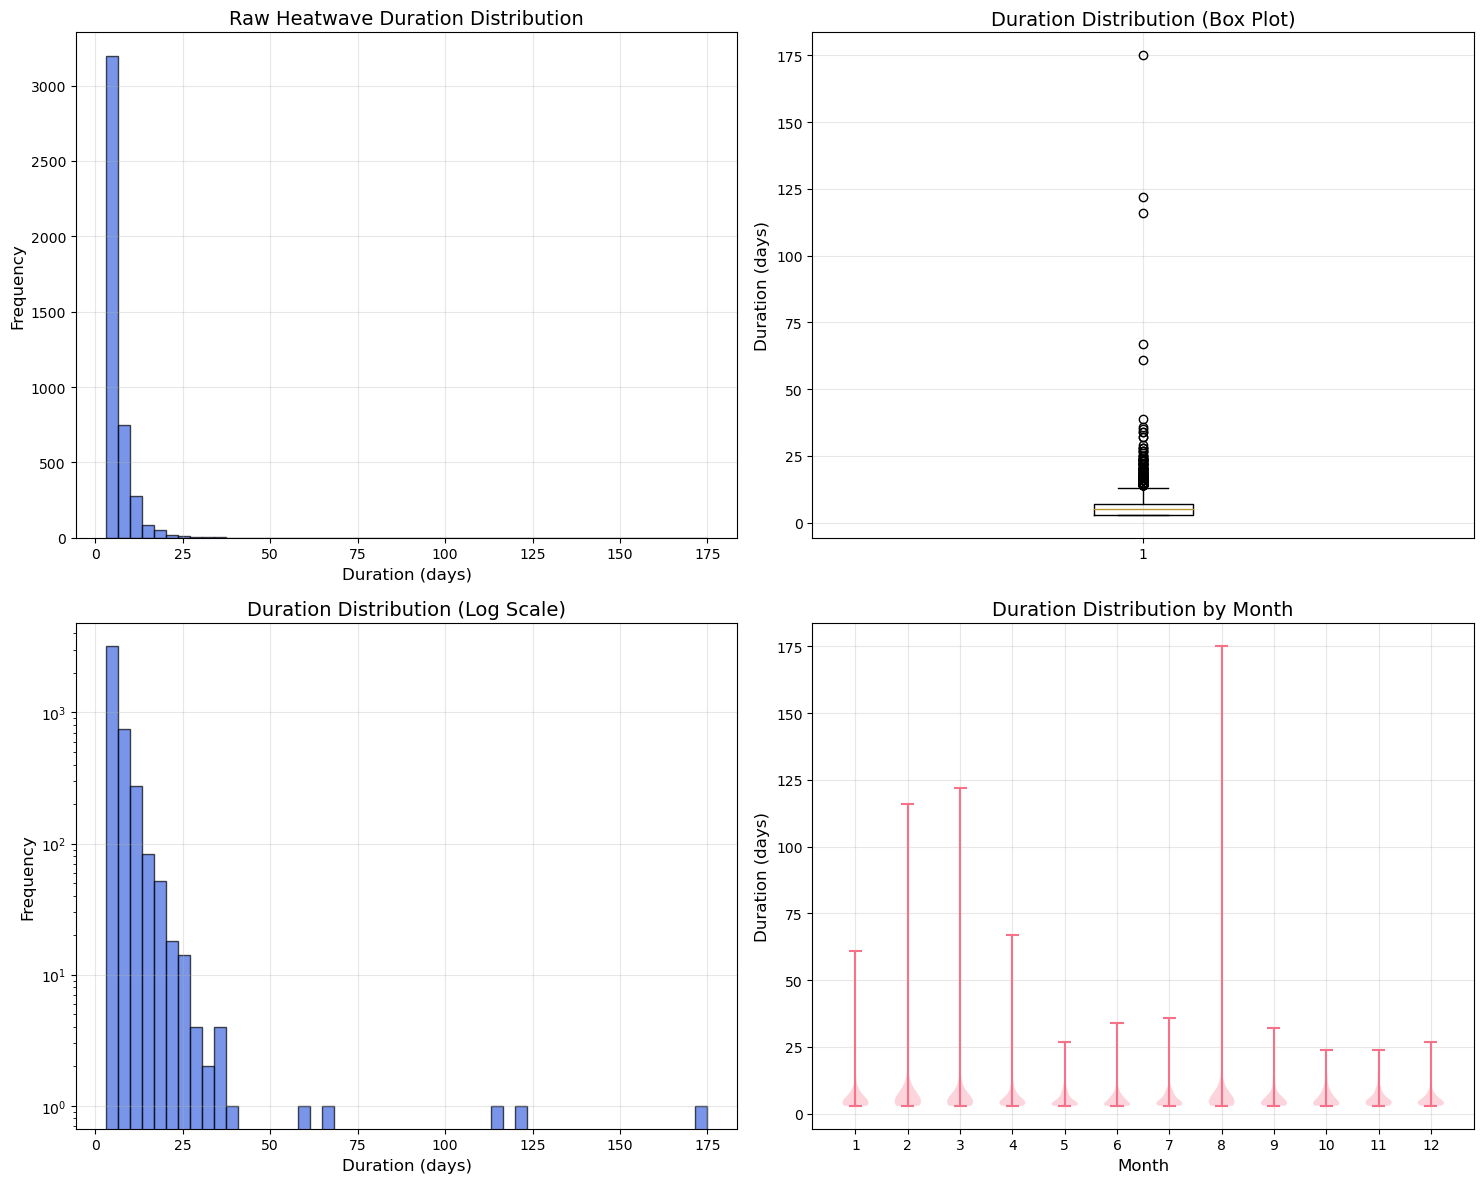

In [11]:
# Duration distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Histogram
axes[0,0].hist(cpv_clean['timespan'], bins=50, alpha=0.7, color='royalblue', edgecolor='black')
axes[0,0].set_xlabel('Duration (days)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].set_title('Raw Heatwave Duration Distribution')
axes[0,0].grid(True, alpha=0.3)

# Box plot
axes[0,1].boxplot(cpv_clean['timespan'])
axes[0,1].set_ylabel('Duration (days)')
axes[0,1].set_title('Duration Distribution (Box Plot)')
axes[0,1].grid(True, alpha=0.3)

# Log scale histogram
axes[1,0].hist(cpv_clean['timespan'], bins=50, alpha=0.7, color='royalblue', edgecolor='black')
axes[1,0].set_xlabel('Duration (days)')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('Duration Distribution (Log Scale)')
axes[1,0].set_yscale('log')
axes[1,0].grid(True, alpha=0.3)

# Violin plot by month
monthly_data = cpv_clean[cpv_clean['month'].between(1, 12)]
parts = axes[1,1].violinplot([monthly_data[monthly_data['month'] == m]['timespan'].values 
                             for m in range(1, 13)], positions=range(1, 13))
axes[1,1].set_xlabel('Month')
axes[1,1].set_ylabel('Duration (days)')
axes[1,1].set_title('Duration Distribution by Month')
axes[1,1].set_xticks(range(1, 13))
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/home/raj.ayush/results/final_ananananal/raw_duration_analysis.png')
plt.show()

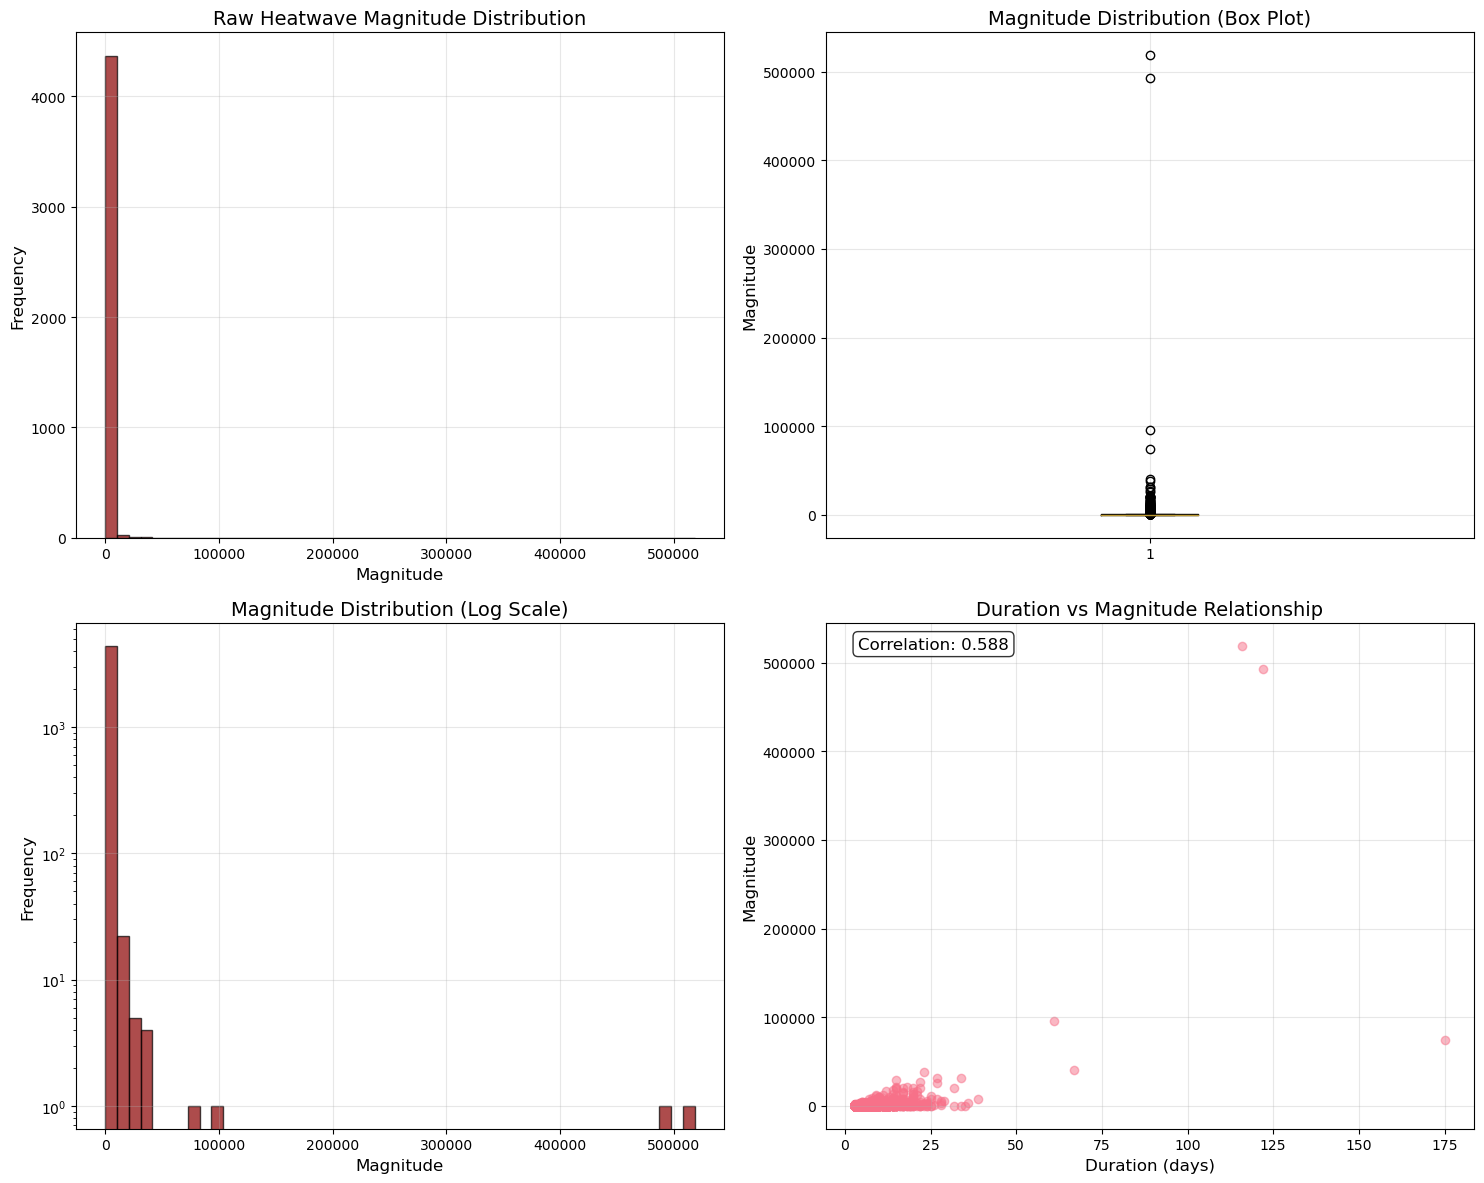

In [12]:
# Magnitude distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Histogram
axes[0,0].hist(cpv_clean['HWMId_magnitude'], bins=50, alpha=0.7, color='darkred', edgecolor='black')
axes[0,0].set_xlabel('Magnitude')
axes[0,0].set_ylabel('Frequency')
axes[0,0].set_title('Raw Heatwave Magnitude Distribution')
axes[0,0].grid(True, alpha=0.3)

# Box plot
axes[0,1].boxplot(cpv_clean['HWMId_magnitude'])
axes[0,1].set_ylabel('Magnitude')
axes[0,1].set_title('Magnitude Distribution (Box Plot)')
axes[0,1].grid(True, alpha=0.3)

# Log scale histogram
axes[1,0].hist(cpv_clean['HWMId_magnitude'], bins=50, alpha=0.7, color='darkred', edgecolor='black')
axes[1,0].set_xlabel('Magnitude')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('Magnitude Distribution (Log Scale)')
axes[1,0].set_yscale('log')
axes[1,0].grid(True, alpha=0.3)

# Scatter plot: Duration vs Magnitude
axes[1,1].scatter(cpv_clean['timespan'], cpv_clean['HWMId_magnitude'], alpha=0.5)
axes[1,1].set_xlabel('Duration (days)')
axes[1,1].set_ylabel('Magnitude')
axes[1,1].set_title('Duration vs Magnitude Relationship')
axes[1,1].grid(True, alpha=0.3)

# Calculate correlation
corr = cpv_clean['timespan'].corr(cpv_clean['HWMId_magnitude'])
axes[1,1].text(0.05, 0.95, f'Correlation: {corr:.3f}', transform=axes[1,1].transAxes, 
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.savefig('/home/raj.ayush/results/final_ananananal/raw_magnitude_analysis.png')
plt.show()

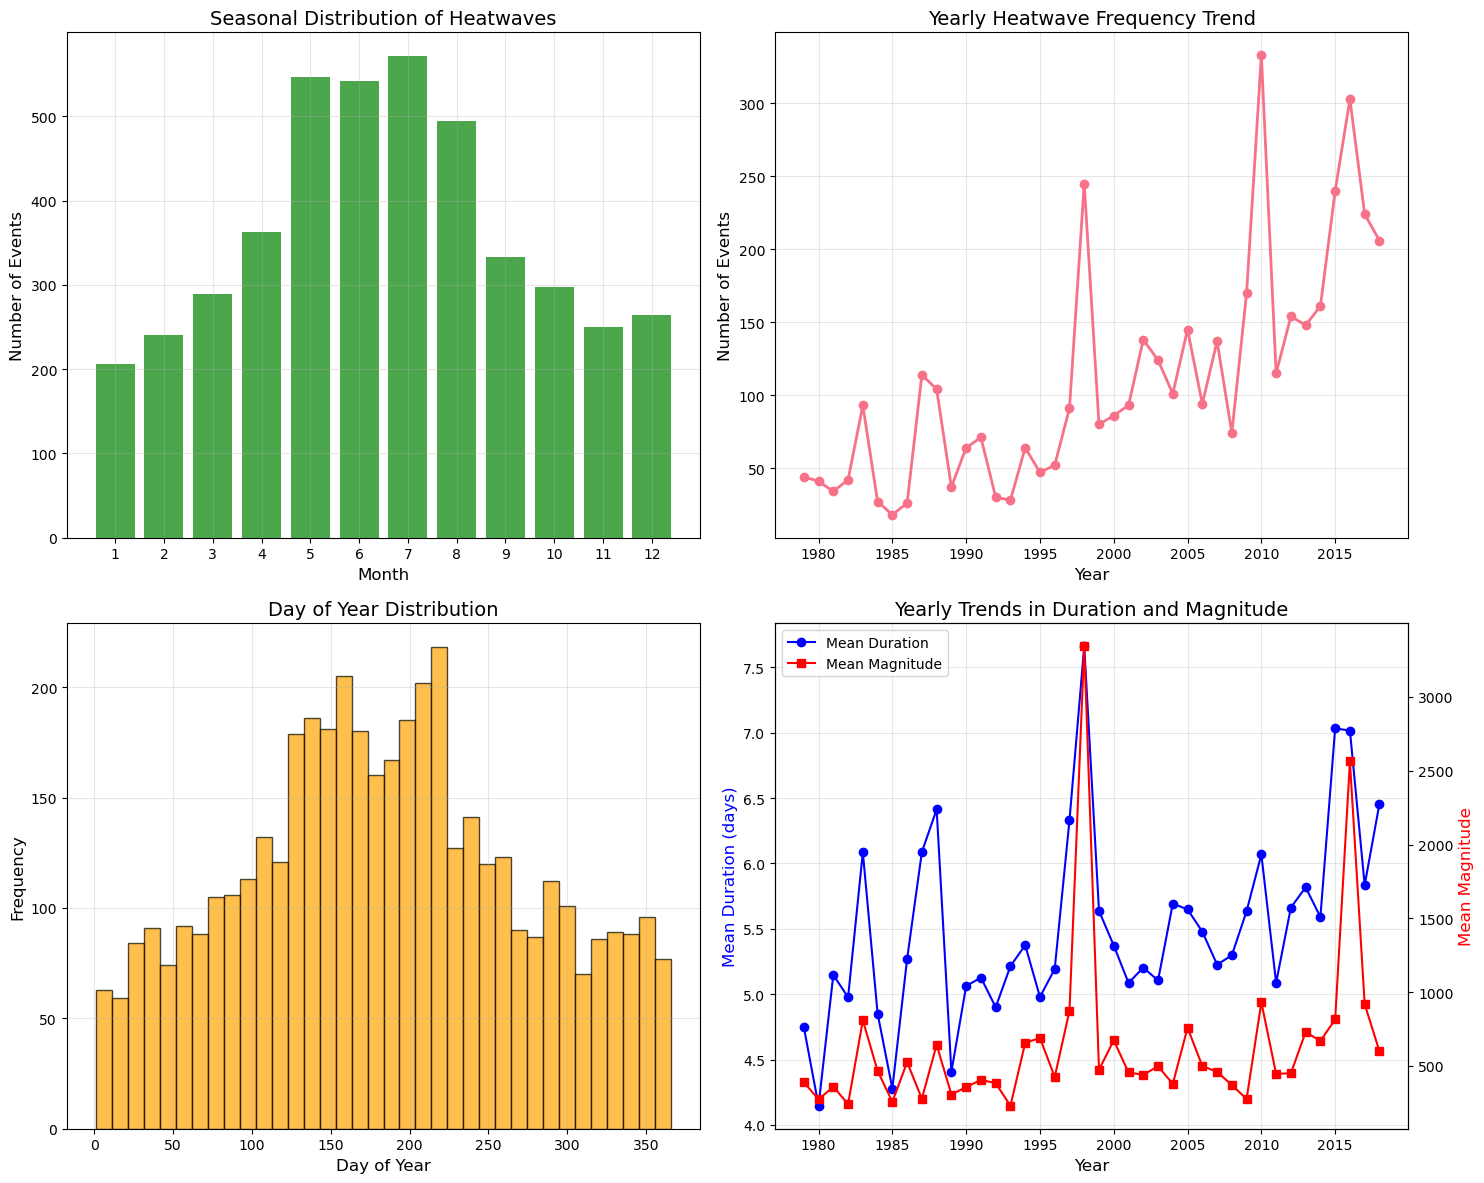

In [13]:
# Temporal analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Monthly distribution
monthly_counts = cpv_clean['month'].value_counts().sort_index()
axes[0,0].bar(monthly_counts.index, monthly_counts.values, alpha=0.7, color='green')
axes[0,0].set_xlabel('Month')
axes[0,0].set_ylabel('Number of Events')
axes[0,0].set_title('Seasonal Distribution of Heatwaves')
axes[0,0].set_xticks(range(1, 13))
axes[0,0].grid(True, alpha=0.3)

# Yearly trend
yearly_counts = cpv_clean['year'].value_counts().sort_index()
axes[0,1].plot(yearly_counts.index, yearly_counts.values, marker='o', linewidth=2, markersize=6)
axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('Number of Events')
axes[0,1].set_title('Yearly Heatwave Frequency Trend')
axes[0,1].grid(True, alpha=0.3)

# Day of year distribution
axes[1,0].hist(cpv_clean['day_of_year'], bins=36, alpha=0.7, color='orange', edgecolor='black')
axes[1,0].set_xlabel('Day of Year')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('Day of Year Distribution')
axes[1,0].grid(True, alpha=0.3)

# Yearly statistics (mean duration and magnitude)
yearly_stats = cpv_clean.groupby('year').agg({
    'timespan': 'mean',
    'HWMId_magnitude': 'mean'
}).reset_index()

ax2 = axes[1,1]
ax3 = ax2.twinx()

line1 = ax2.plot(yearly_stats['year'], yearly_stats['timespan'], 'b-o', label='Mean Duration')
line2 = ax3.plot(yearly_stats['year'], yearly_stats['HWMId_magnitude'], 'r-s', label='Mean Magnitude')

ax2.set_xlabel('Year')
ax2.set_ylabel('Mean Duration (days)', color='b')
ax3.set_ylabel('Mean Magnitude', color='r')
ax2.set_title('Yearly Trends in Duration and Magnitude')
ax2.grid(True, alpha=0.3)

# Add legend
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax2.legend(lines, labels, loc='upper left')

plt.tight_layout()
plt.savefig('/home/raj.ayush/results/final_ananananal/raw_temporal_analysis.png')
plt.show()

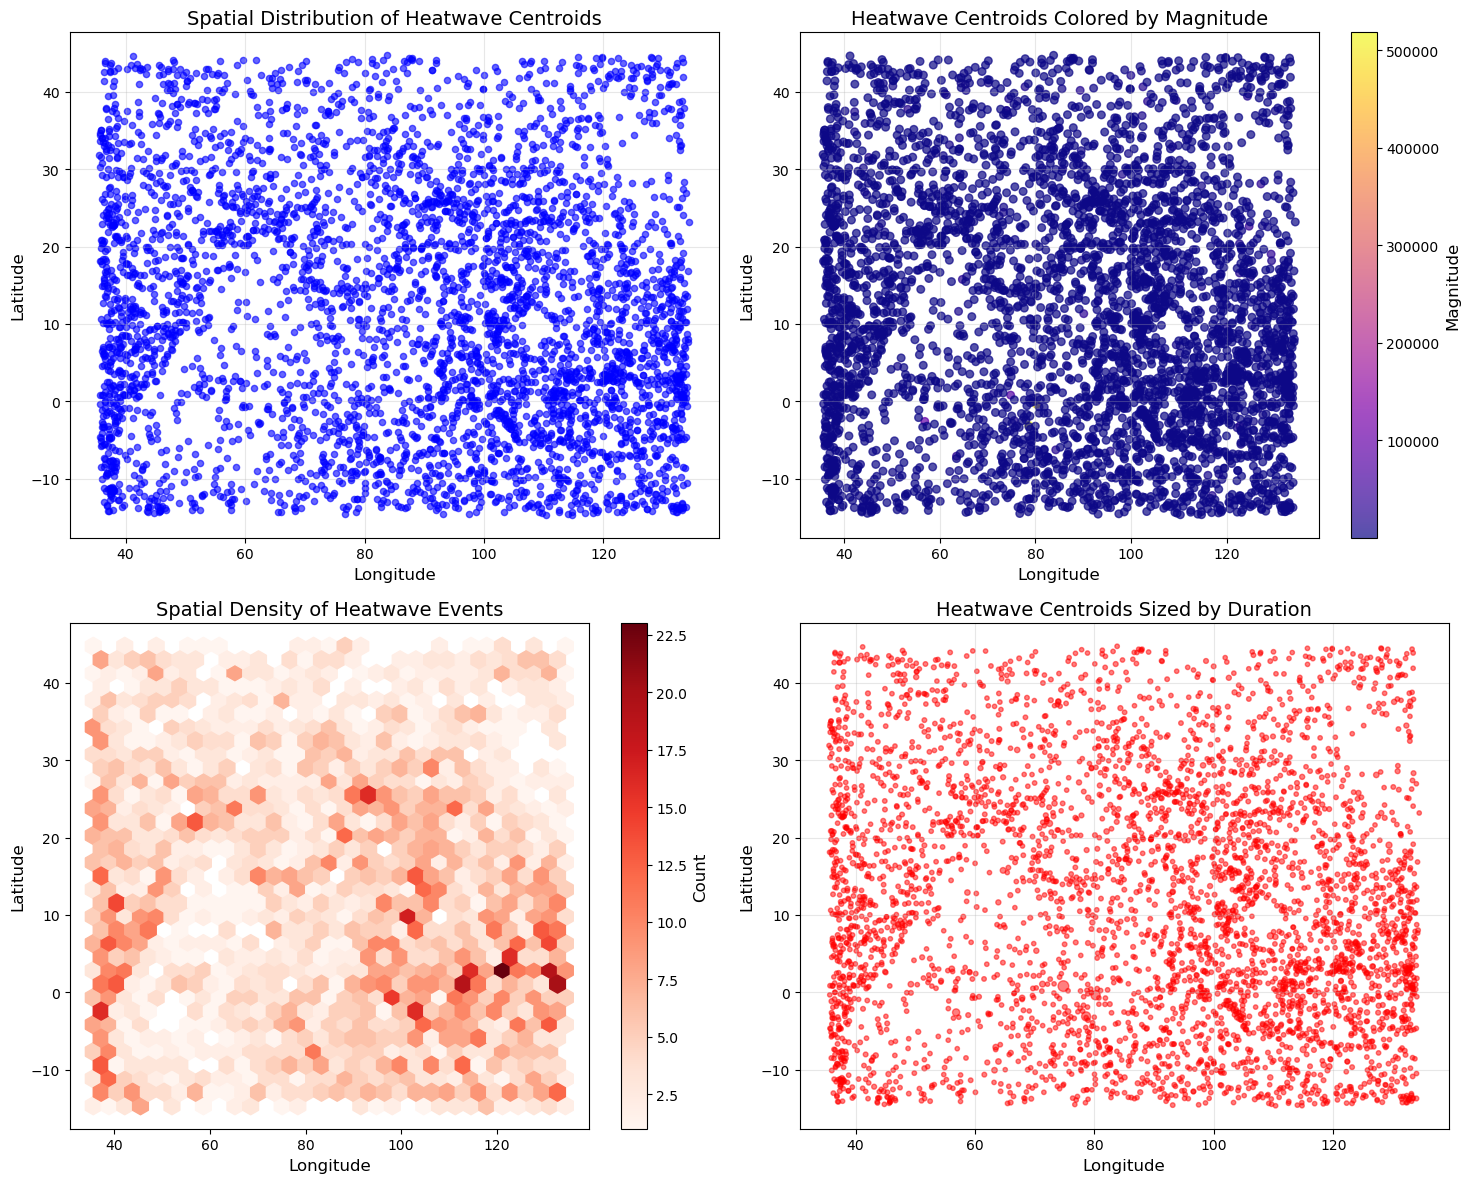

In [14]:
# Spatial analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Basic scatter plot
axes[0,0].scatter(cpv_clean['longitude_mean'], cpv_clean['latitude_mean'], 
                  alpha=0.6, c='blue', s=20)
axes[0,0].set_xlabel('Longitude')
axes[0,0].set_ylabel('Latitude')
axes[0,0].set_title('Spatial Distribution of Heatwave Centroids')
axes[0,0].grid(True, alpha=0.3)

# Magnitude-colored scatter
scatter = axes[0,1].scatter(cpv_clean['longitude_mean'], cpv_clean['latitude_mean'], 
                           c=cpv_clean['HWMId_magnitude'], cmap='plasma', alpha=0.7, s=30)
axes[0,1].set_xlabel('Longitude')
axes[0,1].set_ylabel('Latitude')
axes[0,1].set_title('Heatwave Centroids Colored by Magnitude')
plt.colorbar(scatter, ax=axes[0,1], label='Magnitude')
axes[0,1].grid(True, alpha=0.3)

# Hexbin density plot
hb = axes[1,0].hexbin(cpv_clean['longitude_mean'], cpv_clean['latitude_mean'], 
                      gridsize=30, cmap='Reds', mincnt=1)
axes[1,0].set_xlabel('Longitude')
axes[1,0].set_ylabel('Latitude')
axes[1,0].set_title('Spatial Density of Heatwave Events')
plt.colorbar(hb, ax=axes[1,0], label='Count')

# Duration-sized bubbles
sizes = (cpv_clean['timespan'] - cpv_clean['timespan'].min()) * 50 / cpv_clean['timespan'].max() + 10
axes[1,1].scatter(cpv_clean['longitude_mean'], cpv_clean['latitude_mean'], 
                  s=sizes, alpha=0.5, c='red')
axes[1,1].set_xlabel('Longitude')
axes[1,1].set_ylabel('Latitude')
axes[1,1].set_title('Heatwave Centroids Sized by Duration')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/home/raj.ayush/results/final_ananananal/raw_spatial_analysis.png')
plt.show()

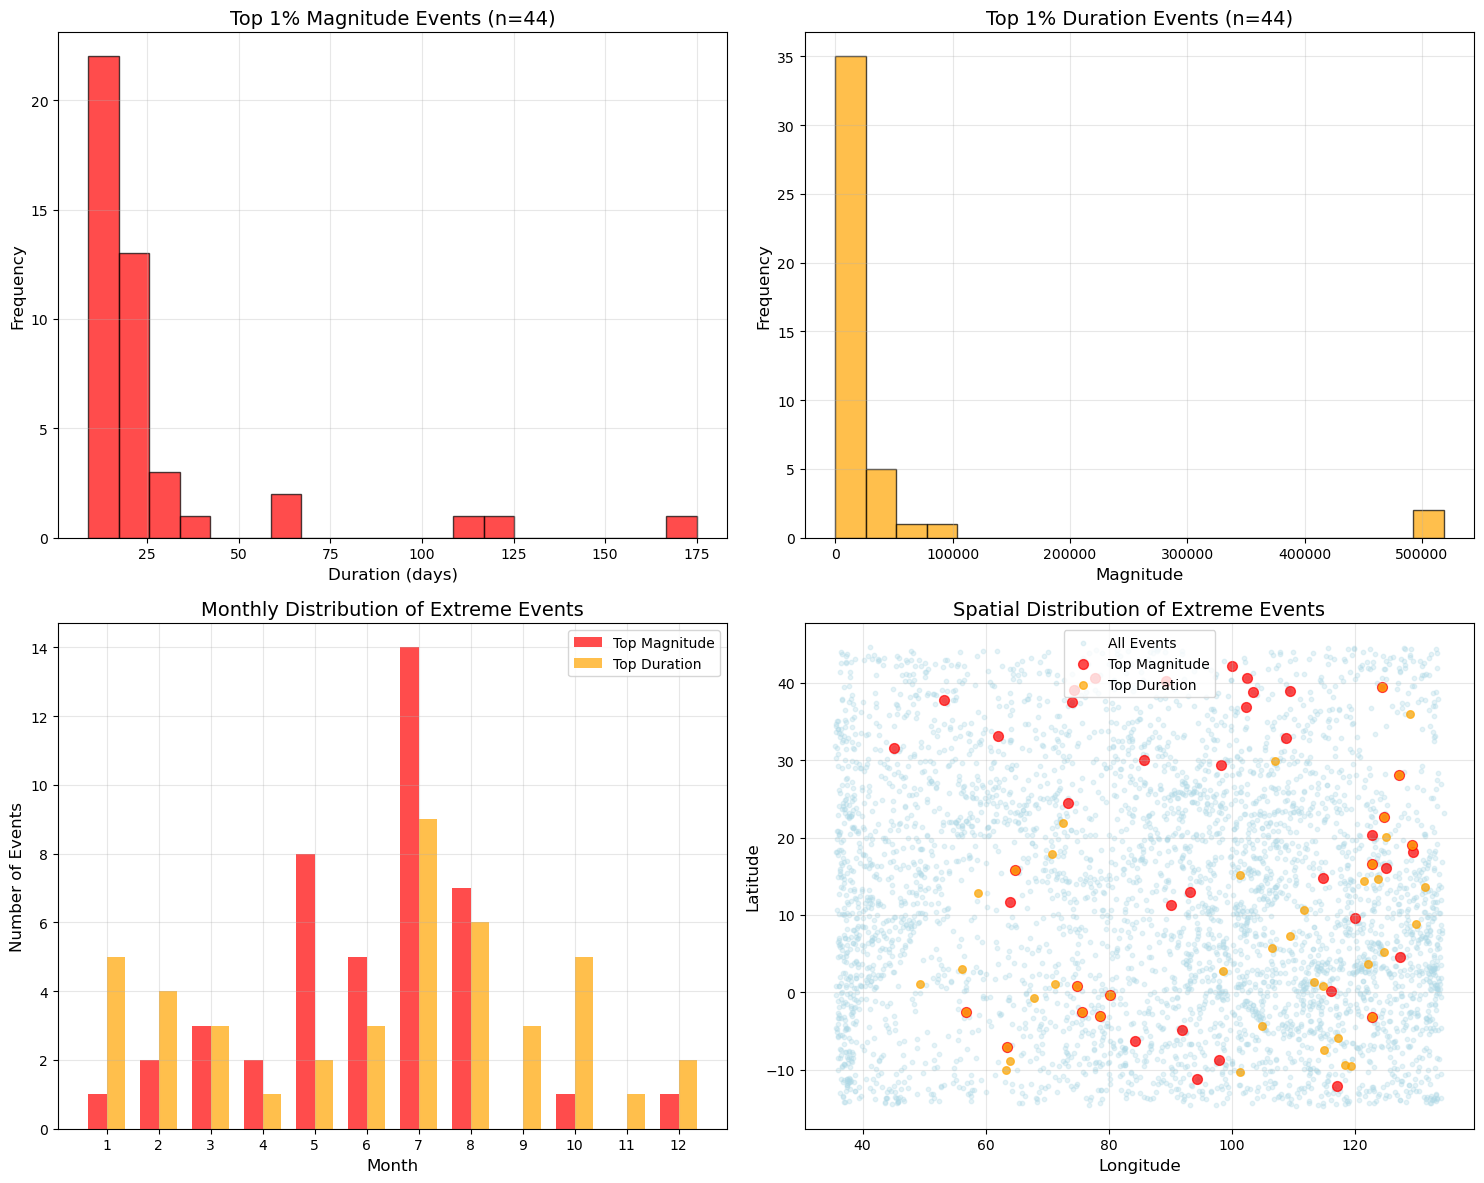

Top 1% magnitude threshold: 8954.20
Top 1% duration threshold: 21.0 days
Extreme magnitude events: 44
Extreme duration events: 44


In [15]:
# Extreme events analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Top 1% by magnitude
top_1_mag = cpv_clean['HWMId_magnitude'].quantile(0.99)
extreme_mag = cpv_clean[cpv_clean['HWMId_magnitude'] >= top_1_mag]

# Top 1% by duration
top_1_dur = cpv_clean['timespan'].quantile(0.99)
extreme_dur = cpv_clean[cpv_clean['timespan'] >= top_1_dur]

# Extreme magnitude events
axes[0,0].hist(extreme_mag['timespan'], bins=20, alpha=0.7, color='red', edgecolor='black')
axes[0,0].set_xlabel('Duration (days)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].set_title(f'Top 1% Magnitude Events (n={len(extreme_mag)})')
axes[0,0].grid(True, alpha=0.3)

# Extreme duration events
axes[0,1].hist(extreme_dur['HWMId_magnitude'], bins=20, alpha=0.7, color='orange', edgecolor='black')
axes[0,1].set_xlabel('Magnitude')
axes[0,1].set_ylabel('Frequency')
axes[0,1].set_title(f'Top 1% Duration Events (n={len(extreme_dur)})')
axes[0,1].grid(True, alpha=0.3)

# Monthly distribution of extremes
extreme_mag_monthly = extreme_mag['month'].value_counts().sort_index()
extreme_dur_monthly = extreme_dur['month'].value_counts().sort_index()

x = range(1, 13)
width = 0.35
axes[1,0].bar([i - width/2 for i in x], 
              [extreme_mag_monthly.get(i, 0) for i in x], 
              width, label='Top Magnitude', alpha=0.7, color='red')
axes[1,0].bar([i + width/2 for i in x], 
              [extreme_dur_monthly.get(i, 0) for i in x], 
              width, label='Top Duration', alpha=0.7, color='orange')
axes[1,0].set_xlabel('Month')
axes[1,0].set_ylabel('Number of Events')
axes[1,0].set_title('Monthly Distribution of Extreme Events')
axes[1,0].set_xticks(x)
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Spatial distribution of extremes
axes[1,1].scatter(cpv_clean['longitude_mean'], cpv_clean['latitude_mean'], 
                  alpha=0.3, c='lightblue', s=10, label='All Events')
axes[1,1].scatter(extreme_mag['longitude_mean'], extreme_mag['latitude_mean'], 
                  c='red', s=50, alpha=0.7, label='Top Magnitude')
axes[1,1].scatter(extreme_dur['longitude_mean'], extreme_dur['latitude_mean'], 
                  c='orange', s=30, alpha=0.7, label='Top Duration')
axes[1,1].set_xlabel('Longitude')
axes[1,1].set_ylabel('Latitude')
axes[1,1].set_title('Spatial Distribution of Extreme Events')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/home/raj.ayush/results/final_ananananal/raw_extreme_analysis.png')
plt.show()

print(f"Top 1% magnitude threshold: {top_1_mag:.2f}")
print(f"Top 1% duration threshold: {top_1_dur:.1f} days")
print(f"Extreme magnitude events: {len(extreme_mag)}")
print(f"Extreme duration events: {len(extreme_dur)}")

=== COMPREHENSIVE STATISTICAL SUMMARY ===


,timespan,HWMId_magnitude,latitude_mean,longitude_mean,n_unique_g_ids
count,4398.000000,4398.000000,4398.000000,4398.000000,4398.000000
mean,5.884948,880.420308,11.870429,87.853970,630.364711
std,5.169006,11110.413898,15.853226,30.075213,1521.378781
min,3.000000,0.001172,-14.647924,35.562112,101.000000
25%,3.000000,29.144086,-0.935698,61.793268,162.000000
50%,5.000000,172.572127,10.584616,92.790176,287.000000
75%,7.000000,468.445551,24.208210,113.040026,587.000000
max,175.000000,518505.199534,44.713415,134.381818,45399.000000


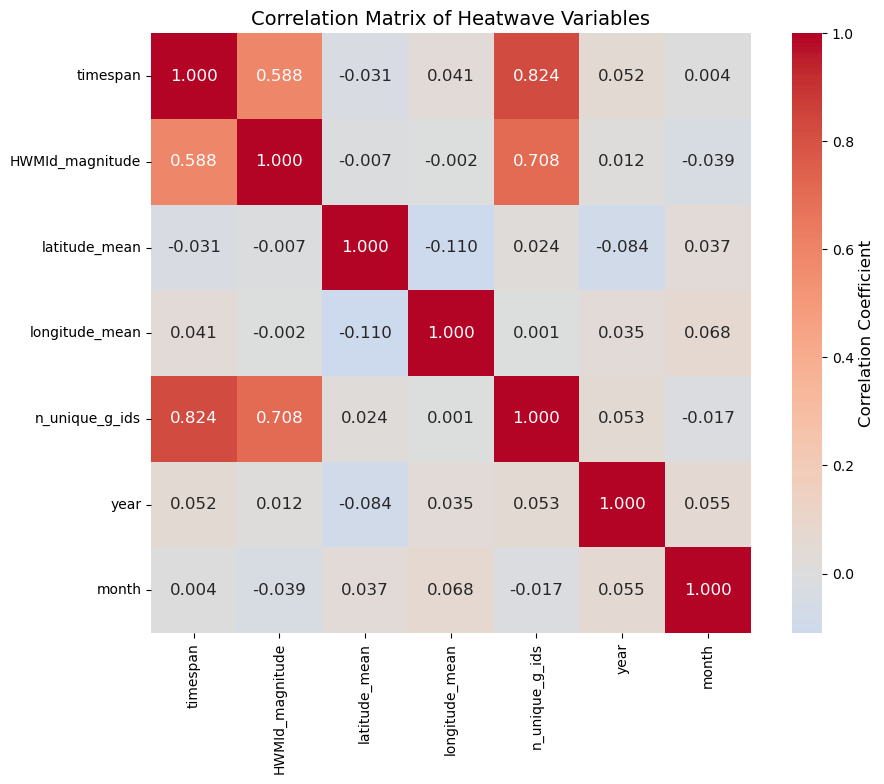


=== STATISTICAL TESTS ===
Duration normality test p-value: 0.000000
Magnitude normality test p-value: 0.000000
Note: p < 0.05 suggests non-normal distribution

Seasonal variation in duration (ANOVA): F=1.602, p=0.091197
Seasonal variation in magnitude (ANOVA): F=1.324, p=0.203609
Note: p < 0.05 suggests significant seasonal variation


In [10]:
# Statistical analysis
print("=== COMPREHENSIVE STATISTICAL SUMMARY ===")

# Basic statistics
stats_summary = cpv_clean[['timespan', 'HWMId_magnitude', 'latitude_mean', 'longitude_mean', 'n_unique_g_ids']].describe()
display(stats_summary)

# Correlation matrix
corr_matrix = cpv_clean[['timespan', 'HWMId_magnitude', 'latitude_mean', 'longitude_mean', 'n_unique_g_ids', 'year', 'month']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Heatwave Variables')
plt.tight_layout()
# plt.savefig('/home/raj.ayush/results/final_ananananal/raw_correlation_matrix.png')
plt.show()

# Statistical tests
print("\n=== STATISTICAL TESTS ===")

# Test for normality
from scipy.stats import shapiro, normaltest
_, p_duration = normaltest(cpv_clean['timespan'])
_, p_magnitude = normaltest(cpv_clean['HWMId_magnitude'])

print(f"Duration normality test p-value: {p_duration:.6f}")
print(f"Magnitude normality test p-value: {p_magnitude:.6f}")
print("Note: p < 0.05 suggests non-normal distribution")

# Seasonal variations test (ANOVA)
from scipy.stats import f_oneway
monthly_durations = [cpv_clean[cpv_clean['month'] == m]['timespan'].values for m in range(1, 13)]
monthly_magnitudes = [cpv_clean[cpv_clean['month'] == m]['HWMId_magnitude'].values for m in range(1, 13)]

f_stat_dur, p_val_dur = f_oneway(*monthly_durations)
f_stat_mag, p_val_mag = f_oneway(*monthly_magnitudes)

print(f"\nSeasonal variation in duration (ANOVA): F={f_stat_dur:.3f}, p={p_val_dur:.6f}")
print(f"Seasonal variation in magnitude (ANOVA): F={f_stat_mag:.3f}, p={p_val_mag:.6f}")
print("Note: p < 0.05 suggests significant seasonal variation")